## Introduction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

# Importing library in order to see the progress bar
from tqdm.notebook import tnrange, tqdm_notebook

In [2]:
df = pd.read_csv('cleaned_twitter_data.csv')

In [3]:
df.shape

(1589521, 10)

In [4]:
df.head()

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,DayOfWeek
0,0,2009-04-06 22:19:45,_TheSpecialOne_,awww thats a bummer you shoulda got david ca...,switchfoot,NaN,;d,4,6,Monday
1,0,2009-04-06 22:19:49,scotthamilton,is upset that he cant update his facebook by t...,NaN,NaN,None,4,6,Monday
2,0,2009-04-06 22:19:53,mattycus,i dived many times for the ball managed to sav...,kenichan,NaN,None,4,6,Monday
3,0,2009-04-06 22:19:57,ElleCTF,my whole body feels itchy and like its on fire,NaN,NaN,None,4,6,Monday
4,0,2009-04-06 22:19:57,Karoli,no its not behaving at all im mad why am i her...,nationwideclass,NaN,None,4,6,Monday


In [5]:
df.isna().sum()

Sentiment          0
Date               0
User               0
Tweet           3156
Tagging       857269
Hashtags     1554267
Emojis             0
Month              0
Day                0
DayOfWeek          0
dtype: int64

In [6]:
df['Tagging'] = df['Tagging'].fillna('None')
df['Hashtags'] = df['Hashtags'].fillna('None')
df['Emojis'] = df['Emojis'].fillna('None')

In [7]:
df.isna().sum()

Sentiment       0
Date            0
User            0
Tweet        3156
Tagging         0
Hashtags        0
Emojis          0
Month           0
Day             0
DayOfWeek       0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.shape

(1586365, 10)

### Taking a Sample data

In [10]:
# copying 10% of data
df_chunk = df.sample(frac=0.1).copy()

In [11]:
df_chunk.shape

(158636, 10)

In [12]:
df_chunk['Sentiment'].value_counts().sum()

158636

In [13]:
df_chunk['Sentiment'].value_counts()

1    79323
0    79313
Name: Sentiment, dtype: int64

### working with sample data

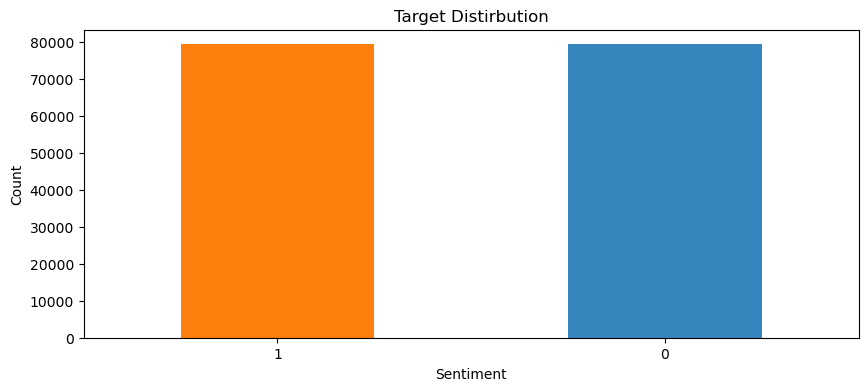

In [14]:
plt.figure(figsize=(10,4))
df_chunk['Sentiment'].value_counts().plot(kind='bar', rot=0, color=['#FF7F0E', '#3685BC'])
plt.title("Target Distirbution")
plt.xlabel("Sentiment")
plt.ylabel("Count")

plt.show()

---
### Data Wrangling

In [15]:
# splitting our data into train and test sets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
df_chunk.head(2)

,Sentiment,Date,User,Tweet,Tagging,Hashtags,Emojis,Month,Day,DayOfWeek
1396498,1,2009-06-06 08:31:50,LilyRoseMelody,im begging nicely,None,None,None,6,6,Saturday
311947,0,2009-06-02 01:13:59,kirak,is trying to get rid of this head pain,None,None,None,6,2,Tuesday


In [17]:
X = df_chunk['Tweet'] # indep
y = df_chunk["Sentiment"] # dep

In [18]:
# Test set 20 percent
X_rem, X_test, y_rem, y_test = train_test_split(X, y, stratify=y, test_size = 0.2, random_state=1)

In [19]:
# Splitting the remainder in two chunks
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size = 0.3, stratify=y_rem, random_state=1)

In [20]:
print(f'Shape of X-test set: {X_test.shape}')
print(f'Shape of X remainder set: {X_rem.shape}')

print(f'Shape of validation set: {X_val.shape}')
print(f'Shape of train set: {X_train.shape}')

Shape of X-test set: (31728,)
Shape of X remainder set: (126908,)
Shape of validation set: (38073,)
Shape of train set: (88835,)


Our final proportions end up being
* Test Set: *0.2*
* Validation Set:  0.8 * 0.3 = *0.24*
* Training Set: 0.8 * 0.7 = *0.56*

In [21]:
# instantiate countvectorized
# 1. Instantiate
# bagofwords_vector = CountVectorizer(stop_words="english", min_df=3)

# 2. Fit
# bagofwords_vector.fit(X_train)

In [22]:
# 3. Transform - tokenize (split to words) & count for each sentence how many times each occurs
# X_transform = bagofwords_vector.transform(X_train)
# X_test_transform = bagofwords_vector.transform(X_test)

In [ ]:
# X_transform

Number of Features 17,146

In [ ]:
# X_test_transform

In [ ]:
# these are now the features, they are the individual tokens
# bagofwords_vector.get_feature_names_out()

In [ ]:
# converting the sparse matrix into a numpy array
# X_transform.toarray()

In [ ]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
# my_df = pd.DataFrame(columns=bagofwords_vector.get_feature_names_out(), data=X_transform.toarray())
# display(my_df)

In [ ]:
# my_df.columns

In [ ]:
# count_tokens = X_transform.sum(axis=0)
# count_tokens

Total count of how many times each word occurs.

In [ ]:
# my_df['advice'].value_counts()

We can look at the sentence length distribution:

In [ ]:
# occurring words shows visually
# plt.figure(figsize=(10,5))
# plt.hist(X_transform.sum(axis=1), bins=np.arange(0,20,1))
# plt.title("Sentence Length Distribution")
# plt.xlabel("occurring Words")
# plt.ylabel("Frequency")
# plt.show()

In [ ]:
# words = bagofwords_vector.get_feature_names_out()
# some_indices = range(1, 17146, round(17146/10))
# samples = [words[i] for i in some_indices]
# print(samples)

In [ ]:
# counts = np.array(X_transform[:, some_indices].sum(axis = 0))

# display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

In [ ]:
# my_df['aaa'].value_counts()

In [ ]:
# word_counts = pd.DataFrame(
#     {"counts": X_transform.toarray().sum(axis=0)},
#     index=bagofwords_vector.get_feature_names_out()
# ).sort_values("counts", ascending=False)

# word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
# plt.title("Top 20 most frequently occurring words")
# plt.ylabel("Count")
# plt.xticks(rotation=45)
# plt.show()

In [22]:
import nltk
from nltk.stem import WordNetLemmatizer

# Let's test it out
# stemmer = nltk.stem.PorterStemmer()

In [22]:
# nltk.download('wordnet')
# nltk.download('omw-1.4')

In [23]:
%%time
lemmatizer = WordNetLemmatizer()

# bagofwords_vector = CountVectorizer(stop_words="english",
#                                     tokenizer = lambda x: [stemmer.stem(i) for i in x.split(' ')],
#                                     min_df=1000)

bagofwords_vector = CountVectorizer(stop_words="english",
                                    tokenizer=lambda x: [lemmatizer.lemmatize(i) for i in x.split()], min_df=3)
# 2. Fit
bagofwords_vector.fit(X_train)

c:\Users\Emran\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\Emran\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


CPU times: total: 6.14 s
Wall time: 6.17 s


CountVectorizer(min_df=3, stop_words='english',
                tokenizer=<function <lambda> at 0x000002CA572E6D40>)

In [29]:
# 3. Transform - tokenize (split to words) & count for each sentence how many times each occurs
X_train_transform = bagofwords_vector.transform(X_train)
X_val_transform = bagofwords_vector.transform(X_val)
X_test_transform = bagofwords_vector.transform(X_test)

In [30]:
X_train_transform

<88835x12428 sparse matrix of type '<class 'numpy.int64'>'
	with 523994 stored elements in Compressed Sparse Row format>

In [31]:
X_val_transform

<38073x12428 sparse matrix of type '<class 'numpy.int64'>'
	with 222173 stored elements in Compressed Sparse Row format>

In [32]:
X_test_transform

<31728x12428 sparse matrix of type '<class 'numpy.int64'>'
	with 184446 stored elements in Compressed Sparse Row format>

15248 features to 12428 feature

In [33]:
# We can extract the information and put it in a data frame to make it easier to see what has occured
my_df = pd.DataFrame(columns=bagofwords_vector.get_feature_names_out(), data=X_train_transform.toarray())
display(my_df)

,aa,aaa,aaaaa,aaaaaa,aaaaand,aaaah,aaaand,aaah,aaahhh,aaahhhh,...,zone,zoo,zoom,zucchini,zune,zzz,zzzz,zzzzz,zzzzzz,zzzzzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88833,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
words = bagofwords_vector.get_feature_names_out()
some_indices = range(1, 12487, round(12487/10))
samples = [words[i] for i in some_indices]
print(samples)

['aaa', 'boiler', 'creepy', 'family', 'hike', 'likee', 'nyt', 'realistic', 'somethingi', 'tropical']


In [35]:
counts = np.array(X_train_transform[:, some_indices].sum(axis = 0))

display(pd.DataFrame({"total_corpus_count": counts[0]}, index=samples).T)

,aaa,boiler,creepy,family,hike,likee,nyt,realistic,somethingi,tropical
total_corpus_count,8,3,29,447,13,3,12,6,3,7


In [36]:
bagofwords_vector.get_feature_names_out()

array(['aa', 'aaa', 'aaaaa', ..., 'zzzzz', 'zzzzzz', 'zzzzzzzzzzz'],
      dtype=object)

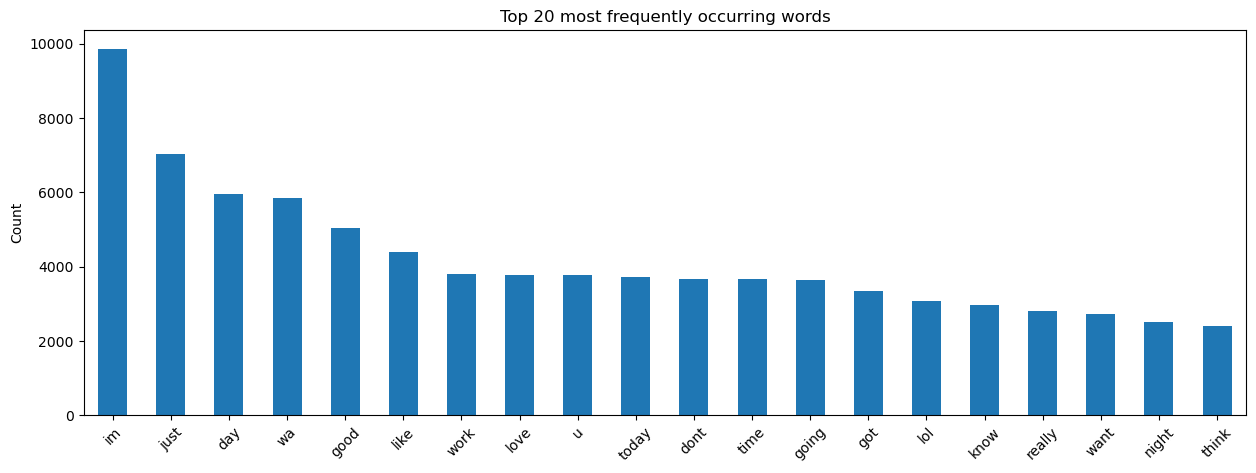

In [37]:
word_counts = pd.DataFrame(
    {"counts": X_train_transform.toarray().sum(axis=0)},
    index=bagofwords_vector.get_feature_names_out()
).sort_values("counts", ascending=False)

word_counts.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 most frequently occurring words")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

### Modeling

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
%%time
# instantiate model
logreg = LogisticRegression(solver='lbfgs', max_iter=100000)# saga different regularization and try out

# fit the model
logreg.fit(X_train_transform, y_train)

CPU times: total: 12.1 s
Wall time: 2.23 s


LogisticRegression(max_iter=100000)

In [40]:
# Training and test score
print(f"Train score: {logreg.score(X_train_transform, y_train)}")
print(f"Validation score: {logreg.score(X_val_transform, y_val)}")

Train score: 0.807429504136883
Validation score: 0.7551020408163265


In [41]:
logreg.coef_[0]

array([-0.07082719, -0.31353434,  0.3722538 , ...,  0.39068942,
        0.40373467, -0.41627236])

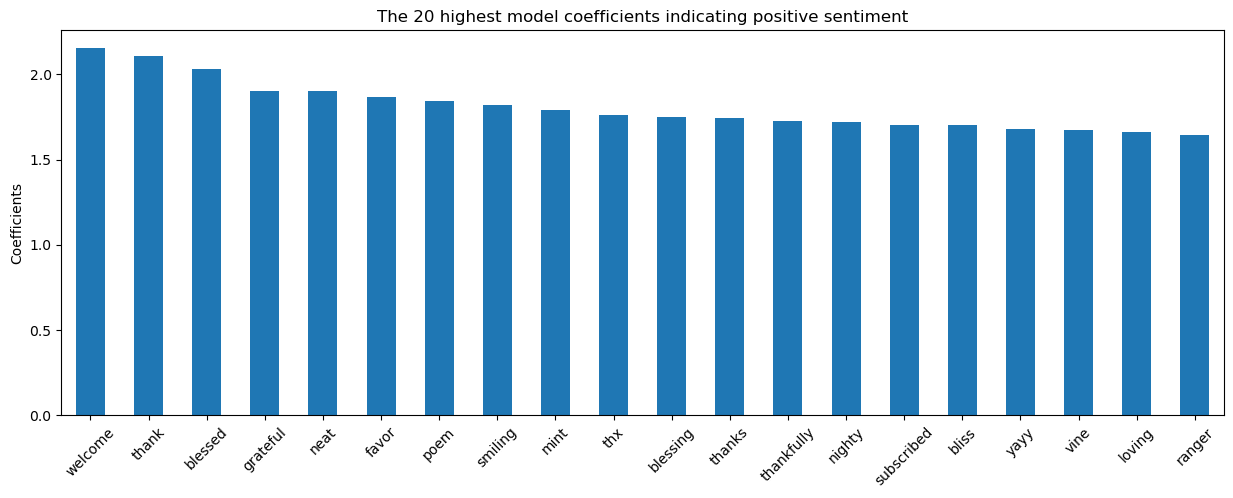

In [42]:
word_coefficients = pd.DataFrame(
    {"coefficients": logreg.coef_[0]},
    index=bagofwords_vector.get_feature_names_out()
).sort_values("coefficients", ascending=False)

word_coefficients.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 highest model coefficients indicating positive sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

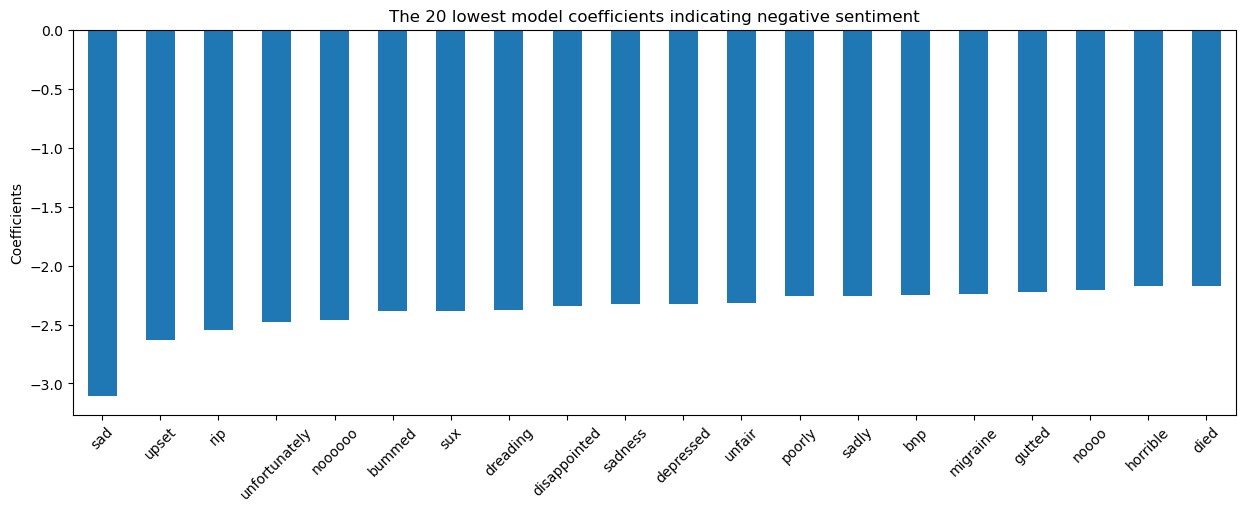

In [44]:
word_coefficients.sort_values("coefficients", ascending=True).head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 lowest model coefficients indicating negative sentiment")
plt.ylabel("Coefficients")
plt.xticks(rotation=45)
plt.show()

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [43]:
# Initializing Scale
# scaler = StandardScaler()

# # Fitting scale
# scaler.fit(X_train_transform)

# # Transform scale
# X_train = scaler.transform(X_train_transform)
# X_validation = scaler.transform(X_val_transform)

In [46]:
%%time
# instantiate model
logreg = LogisticRegression(solver='saga', max_iter=100000)# saga different regularization and try out

# fit the model
logreg.fit(X_train_transform, y_train)
# Training and test score
print(f"Train score: {logreg.score(X_train_transform, y_train)}")
print(f"Validation score: {logreg.score(X_val_transform, y_val)}")

Train score: 0.8070580289300389
Validation score: 0.7550757754839388
CPU times: total: 20.8 s
Wall time: 20.9 s


In [47]:
%%time
# instantiate model
logreg = LogisticRegression(C=100, solver='liblinear', max_iter=100000)# saga different regularization and try out

# fit the model
logreg.fit(X_train_transform, y_train)
# Training and test score
print(f"Train score: {logreg.score(X_train_transform, y_train)}")
print(f"Validation score: {logreg.score(X_val_transform, y_val)}")

Train score: 0.8214667642258119
Validation score: 0.7338271215822236
CPU times: total: 26 s
Wall time: 4.43 s


In [49]:
# estimators = [('reduce_dim', PCA()),
#             ('logreg_model', LogisticRegression())]
estimators = [('logreg_model', LogisticRegression())]
pipe = Pipeline(estimators)

In [50]:
params = {
    'logreg_model__solver': ['lbfgs','saga', 'liblinear'],
    'logreg_model__C': [1, 100]
}

grid_search_gbc = GridSearchCV(pipe, param_grid=params, cv = 5, n_jobs = -1, verbose = 1)

In [51]:
grid_search_gbc.fit(X_train_transform.todense(), y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


PicklingError: Could not pickle the task to send it to the workers.

In [46]:
# # best score
# print(f"best score: {grid_search.best_score_}")

# # best parameters
# print(f"best parameters: {grid_search.best_params_}")

In [47]:
# Importing library in order to see the progress bar
from tqdm.notebook import tnrange, tqdm_notebook

In [59]:
# setting array
cross_validation_scores = []

c_range = np.array([0.001, 0.01, 0.1, 0.5, 1, 10, 30, 60, 80, 100])

# Do some cross validation
for c in tqdm_notebook(c_range):
    Logreg_model_fold = LogisticRegression(C=c, solver='lbfgs', max_iter=10000, random_state=1)
    cv_score = np.mean(cross_val_score(Logreg_model_fold, X_train_transform, y_train, cv = 5, n_jobs=-1))
    cross_validation_scores.append(cv_score)
    
    print(f'C: {c}')
    print(f'cv_score {cv_score}')

  0%|          | 0/10 [00:00<?, ?it/s]

C: 0.001
cv_score 0.7014014746440029
C: 0.01
cv_score 0.7359824393538583
C: 0.1
cv_score 0.7539370743513255
C: 0.5
cv_score 0.7534305172510836
C: 1.0
cv_score 0.7501998086339843
C: 10.0
cv_score 0.7354533686047166
C: 30.0
cv_score 0.7299150109754038
C: 60.0
cv_score 0.7269882366184499
C: 80.0
cv_score 0.725772499577869
C: 100.0
cv_score 0.7251533742331289


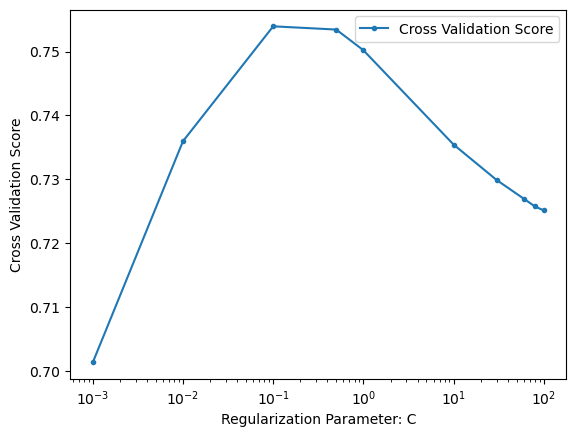

In [60]:
plt.figure()
plt.plot(c_range, cross_validation_scores,label="Cross Validation Score",marker='.')
plt.legend()
plt.xscale("log")
plt.xlabel('Regularization Parameter: C')
plt.ylabel('Cross Validation Score')
plt.show()